In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
np.random.seed(30)
X = np.random.uniform(0, 2*np.pi, 1000)
y = np.sin(X) + np.random.normal(0,0.5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(32, activation=LeakyReLU(alpha=0.2),kernel_regularizer=l2(0.01)),
    Dense(16, activation=LeakyReLU(alpha=0.2),kernel_regularizer=l1(0.01)),
    Dense(8, activation=LeakyReLU(alpha=0.2),kernel_regularizer=l2(0.01)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])



Epoch 1/1000
25/25 [==============================] - 1s 11ms/step - loss: 1.6569 - val_loss: 1.5395
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.4344 - val_loss: 1.3072
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.2180 - val_loss: 1.1024
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 1.0358 - val_loss: 0.9382
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8797 - val_loss: 0.7926
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.7545 - val_loss: 0.6855
Epoch 7/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6515 - val_loss: 0.5887
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5654 - val_loss: 0.5082
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4928 - val_loss: 0.4428
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4319 - val_loss: 0.386

KeyboardInterrupt: 

In [ ]:
#load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Parameter_estimation/sinx.keras')


7/7 [==============================] - 0s 2ms/step


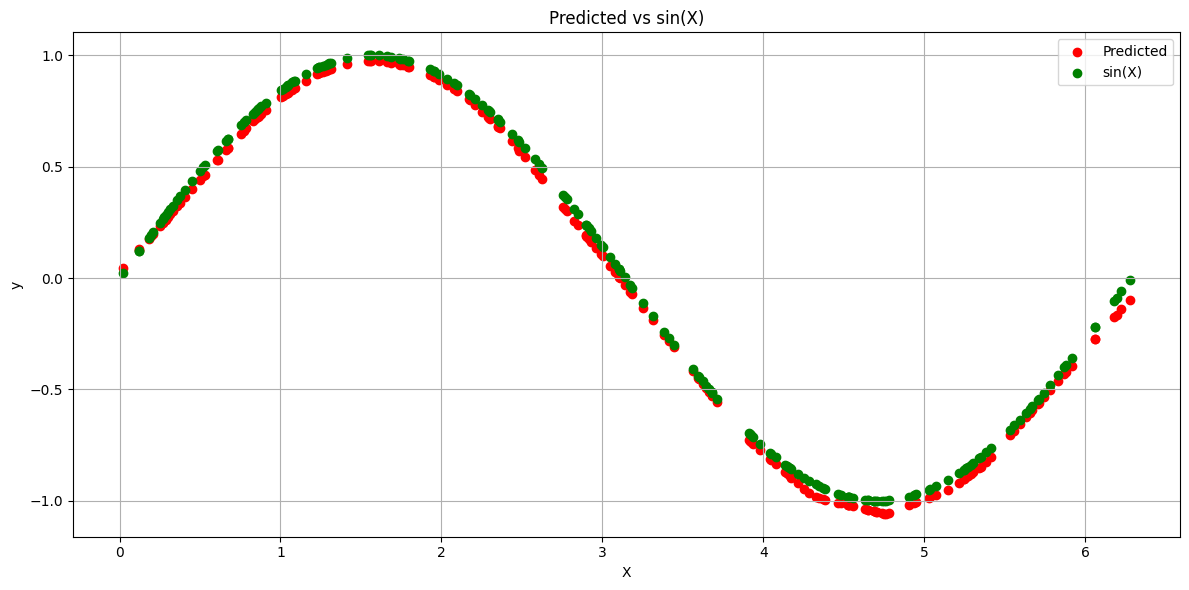

In [ ]:
y_pred = model.predict(X_val)

y_sin = np.sin(X_val)
plt.figure(figsize=(12, 6))

# Plot actual vs predicted vs sin(X)
#plt.scatter(X_val, y_val, color='blue', label='Actual')
plt.scatter(X_val, y_pred, color='red', label='Predicted')
plt.scatter(X_val, y_sin, color='green', label='sin(X)')
plt.title('Predicted vs sin(X)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
model.save('sinx.keras')

In [ ]:
!cp '/content/sinx.keras' '/content/drive/MyDrive/Colab Notebooks/sinx.keras'